# Locatioin Based Analysis

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns

from folium.plugins import HeatMap
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

import warnings

warnings.filterwarnings('ignore')

# Mounting Google Drive (as dataset is in Google Drive)
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/ML Projects/Cognifyz Technologies/MACHINE LEARNING TASK LIST AND DATASET/Restaurant_Reviews.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
# Check for null values and handle missing data
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing Latitude or Longitude
df.dropna(subset=['Longitude', 'Latitude'], inplace=True)

Missing values per column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


## Step 1: Visualize the Geographical Distribution

In [ ]:
# Create a base map centered on the average Latitude and Longitude
restaurant_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

In [ ]:
# Add restaurant markers to the map
for _, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"{row['Restaurant Name']} ({row['Cuisines']})").add_to(restaurant_map)

In [ ]:
# Save and display the map
restaurant_map.save('restaurants_map.html')
print("Map saved as 'restaurants_map.html'")

Map saved as 'restaurants_map.html'


In [ ]:
# Heatmap for restaurant density
heatmap_data = df[['Latitude', 'Longitude']].dropna()
HeatMap(heatmap_data.values).add_to(restaurant_map)
restaurant_map.save('restaurants_heatmap.html')
print("Heatmap saved as 'restaurants_heatmap.html'")

Heatmap saved as 'restaurants_heatmap.html'


## Step 2: Group by City and Analyze Concentration

In [ ]:
# Count number of restaurants per city
restaurant_count = df.groupby('City').size().reset_index(name='Number of Restaurants')
top_cities = restaurant_count.sort_values('Number of Restaurants', ascending=False).head(10)
print("Top 10 cities by number of restaurants:")
print(top_cities)

Top 10 cities by number of restaurants:
            City  Number of Restaurants
88     New Delhi                   5473
50       Gurgaon                   1118
89         Noida                   1080
43     Faridabad                    251
48     Ghaziabad                     25
17  Bhubaneshwar                     21
69       Lucknow                     21
5       Amritsar                     21
2      Ahmedabad                     21
51      Guwahati                     21


## Step 3: Calculate Statistics (Ratings, Price Range)

In [ ]:
# Calculate average rating and price range per city
city_stats = df.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Price range': 'mean'
}).reset_index()

city_stats.rename(columns={'Aggregate rating': 'Average Rating', 'Price range': 'Average Price Range'}, inplace=True)
print("City statistics:")
print(city_stats.sort_values('Average Rating', ascending=False))

City statistics:
                 City  Average Rating  Average Price Range
56         Inner City        4.900000             4.000000
107       Quezon City        4.800000             3.000000
73        Makati City        4.650000             3.000000
95         Pasig City        4.633333             3.000000
75   Mandaluyong City        4.625000             3.750000
..                ...             ...                  ...
88          New Delhi        2.438845             1.621597
83          Montville        2.400000             3.000000
78          Mc Millan        2.400000             1.000000
89              Noida        2.036204             1.601852
43          Faridabad        1.866932             1.454183

[141 rows x 3 columns]


In [ ]:
# Most common cuisine per city
def most_common_cuisine(cuisines):
    cuisines_list = [c.strip() for c in str(cuisines).split(',')]
    return Counter(cuisines_list).most_common(1)[0][0] if cuisines_list else "Unknown"

df['Most Common Cuisine'] = df['Cuisines'].apply(most_common_cuisine)
city_cuisine = df.groupby('City')['Most Common Cuisine'].apply(lambda x: x.mode()[0])
print("Most common cuisine by city:")
print(city_cuisine)

Most common cuisine by city:
City
Abu Dhabi                   Indian
Agra                  North Indian
Ahmedabad             North Indian
Albany                    American
Allahabad             North Indian
                        ...       
Weirton                     Burger
Wellington City               Cafe
Winchester Bay              Burger
Yorkton                      Asian
��stanbul          Restaurant Cafe
Name: Most Common Cuisine, Length: 141, dtype: object


## Step 4: Visualize Insights

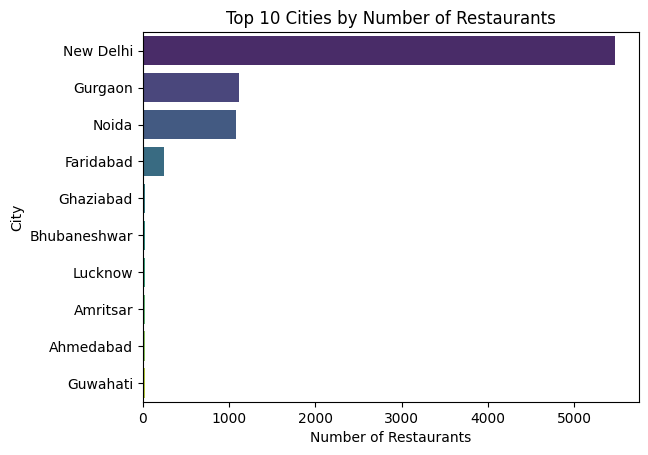

In [ ]:
# Visualization: Top 10 cities by number of restaurants
sns.barplot(data=top_cities, x='Number of Restaurants', y='City', palette='viridis')
plt.title('Top 10 Cities by Number of Restaurants')
plt.show()

In [ ]:
# Visualization: Average rating vs price range
sns.scatterplot(data=city_stats, x='Average Price Range', y='Average Rating', hue='City', size='Average Rating', sizes=(40, 200))
plt.title('Average Price Range vs Average Rating by City')
plt.show()

NameError: name 'sns' is not defined

## Step 5: Save Processed Data and Findings

In [ ]:
# Save processed data
df.to_csv('processed_restaurant_data.csv', index=False)
print("Processed data saved as 'processed_restaurant_data.csv'")


Processed data saved as 'processed_restaurant_data.csv'


In [ ]:
from google.colab import files
files.download('restaurants_map.html')
files.download('restaurants_heatmap.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>